In [1]:
from settings import *
%matplotlib inline
from matplotlib import patches
config_dict = process_config()
info_file = config_dict['data']['exp_design']
info = pd.read_csv(info_file, index_col=0)
count_file = config_dict['counts']['tpms_4']
figures_dir = config_dict['out_dir']['figures']
results_dir = config_dict['out_dir']['tables']

info = info[info.experiment !="E1"]
info['position'] = info['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})

count_file = config_dict['counts']['tpms_30']

/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/lib/config


In [2]:
info.head()

,experiment,case,time_point,strain,position,RIN
sample,,,,,,
S76067,E2,Case5,30 min,HI,Merge,6.8
S76068,E2,Case5,30 min,HI,Merge,6.1
S76069,E2,Case5,30 min,HI,Merge,6.1
S76070,E2,Case6,0 min,HI,Merge,6.4
S76071,E2,Case6,0 min,HI,Merge,4.5


In [3]:
cnts = pd.read_csv(count_file, index_col=0)[info.index]
cnts_norm = cnts.apply(vis.invnorm)

In [4]:
def correlation_within_case(norm_counts, info, col_name, case):
    samples = info[info[col_name]==case].index  # Get all replicates belonging to case
    combs = itertools.combinations(samples,2)   # Get all combinations of replicates     
    corr = [norm_counts[sample[0]].corr(norm_counts[sample[1]], method='pearson')*100 for sample in combs] # calculate correlation
    df = pd.DataFrame({"sample":[case]*len(corr), "pearson":corr})
    return df

def correlation_by_condition(norm_counts,  info, col_name, cases):    
    corr_df = pd.concat([correlation_within_case(norm_counts, info, col_name, case) for case in cases]) 
    return corr_df


In [5]:
replicates = ["Case13", "Case14", "Case7", "Case12", "Case8", "Case11"]
replicates_corr = correlation_by_condition(cnts_norm, info, "case", replicates)
replicates_corr["sample"] = replicates_corr['sample'].map(samples)

position_group = ["{}|{}".format(wt,bh_wt),
                  "{}|{}".format(wt, bh_mut), 
                  "{}|{}".format(mut, bh_mut)]


position_corr = correlation_by_condition(cnts_norm, info, "position", position_group)
corr_df = pd.concat([replicates_corr, position_corr])

In [6]:
print(replicates_corr.head())
print("\n")
print(position_corr.head())

                       sample    pearson
0   WT | Behind Merge | 0 min  96.941639
1   WT | Behind Merge | 0 min  98.046395
2   WT | Behind Merge | 0 min  97.556099
0  WT | Behind Merge | 30 min  97.595468
1  WT | Behind Merge | 30 min  97.881965


            sample    pearson
0  WT|Behind Merge  96.941639
1  WT|Behind Merge  98.046395
2  WT|Behind Merge  97.336542
3  WT|Behind Merge  97.667151
4  WT|Behind Merge  97.616907


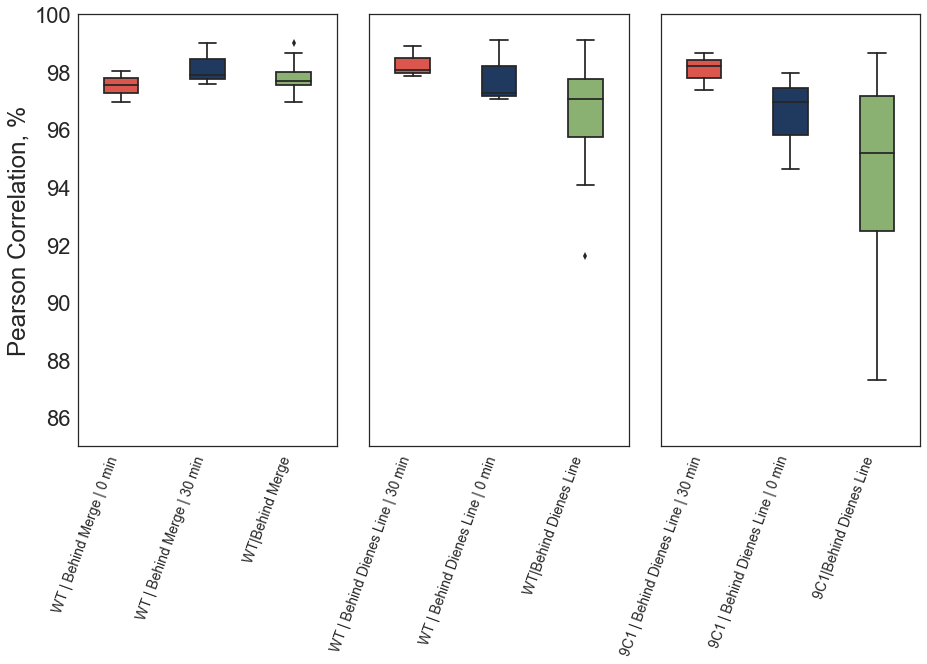

In [7]:
fig = plt.figure(figsize=(9,5))

sns.set(font_scale = 2.2)
sns.set_style("white")

ax1 = fig.add_axes([0.1, 0.5, 0.4, 1.2],
                    xticklabels=[], ylim=(85, 100))
samples1 = [samples["Case13"], samples["Case14"], "{}|{}".format(wt,bh_wt)]
df1 = corr_df[corr_df["sample"].isin(samples1)]
sns.boxplot(x = "sample", y = "pearson", palette=[col1, col5, col3],data = df1,width=0.4)
plt.ylabel("Pearson Correlation, %")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70, fontsize = 14, ha="right")
ax1.set_xlabel("")



ax2 = fig.add_axes([0.55, 0.5, 0.4, 1.2],
                    xticklabels=[], ylim=(85, 100))
samples2 = [samples["Case12"], samples["Case7"], "{}|{}".format(wt,bh_mut)]
df2 = corr_df[corr_df["sample"].isin(samples2)]
sns.boxplot(x = "sample", y = "pearson",palette=[col1,col5, col3], data = df2, width=0.4)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70, fontsize = 14, ha="right")
ax2.set_yticklabels("")
ax2.set_ylabel("")
ax2.set_xlabel("")

ax3 = fig.add_axes([1.0, 0.5, 0.4, 1.2],
                    xticklabels=[], ylim=(85, 100))
samples3 = [samples["Case11"], samples["Case8"], "{}|{}".format(mut,bh_mut)]
df3 = corr_df[corr_df["sample"].isin(samples3)]
sns.boxplot(x = "sample", y = "pearson",palette=[col1,col5, col3], data = df3, width=0.4)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=70, fontsize = 14, ha="right")
ax3.set_yticklabels("")
ax3.set_ylabel("")
ax3.set_xlabel("")

fig.savefig(os.path.join(figures_dir, "Figure_4.png"), dpi=300, bbox_inches="tight")

In [9]:
bh_line_samples = ["Case13", "Case14", "Case12", "Case7", "Case11", "Case8"]
bh_line_info = info[info["case"].isin(bh_line_samples)]
bh_line_cnts = cnts_norm[bh_line_info.index]

In [10]:
pDf, pc1_var, pc2_var = vis.findTwoComponents(bh_line_cnts, bh_line_info)
pDf

,PC1,PC2,experiment,case,time_point,strain,position,RIN
S76073,-7.790713,5.297090,E2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2
S76074,-3.539629,4.324055,E2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3
S76075,-3.794741,0.373831,E2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9
S76076,-5.756244,9.675035,E2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5
S76077,-5.434493,8.914506,E2,Case8,30 min,Mix,9C1|Behind Dienes Line,6.6
S76078,-5.080574,4.026174,E2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.7
S76085,20.826361,-2.390461,E2,Case11,0 min,Mix,9C1|Behind Dienes Line,7.5
S76086,14.112516,1.445791,E2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.4
S76087,7.662615,4.505766,E2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.7
S76088,14.198000,-1.738638,E2,Case12,0 min,Mix,WT|Behind Dienes Line,7.3


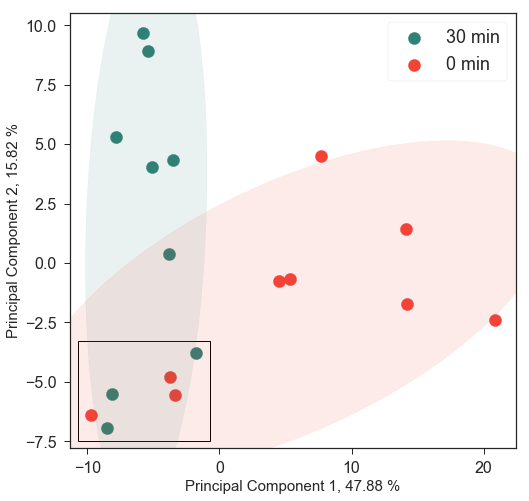

In [11]:
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "time_point",clrs=[col4, col1], title = "", filename = '', el=True )
rect = patches.Rectangle((-10.7,-7.5),10,4.2,linewidth=1,edgecolor='k',facecolor='none')
ax = fig.gca()
ax.add_patch(rect)
#fig.savefig(os.path.join(figures_dir, "Figure_5a.png"), dpi=300, bbox_inches="tight")

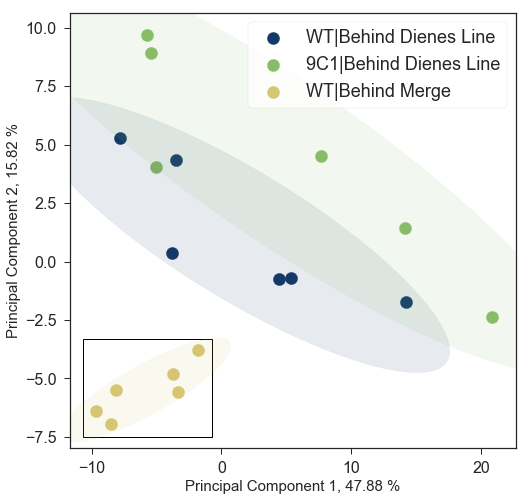

In [12]:
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "position", clrs=[col5,col3,col2], title = "", filename = '', el=True )
rect = patches.Rectangle((-10.7,-7.5),10,4.2,linewidth=1,edgecolor='k',facecolor='none')
ax = fig.gca()
ax.add_patch(rect)
#fig.savefig(os.path.join(figures_dir, "Figure_5b.png"), dpi=300, bbox_inches="tight")

In [13]:
mk_file = config_dict["data"]["mutant_killing"]
mk = pd.read_csv(mk_file, index_col=0, names=["Kan TPM"])
mk = mk.join(bh_line_info, how = "inner")
mk['samples'] = [samples[i] for i in mk["case"]]
mk

,Kan TPM,experiment,case,time_point,strain,position,RIN,samples
S76073,0.99,E2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2,WT | Behind Dienes Line | 30 min
S76074,3.24,E2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3,WT | Behind Dienes Line | 30 min
S76075,1.04,E2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9,WT | Behind Dienes Line | 30 min
S76076,377.11,E2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5,9C1 | Behind Dienes Line | 30 min
S76077,368.43,E2,Case8,30 min,Mix,9C1|Behind Dienes Line,6.6,9C1 | Behind Dienes Line | 30 min
S76078,366.00,E2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.7,9C1 | Behind Dienes Line | 30 min
S76085,179.49,E2,Case11,0 min,Mix,9C1|Behind Dienes Line,7.5,9C1 | Behind Dienes Line | 0 min
S76086,196.33,E2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.4,9C1 | Behind Dienes Line | 0 min
S76087,259.81,E2,Case11,0 min,Mix,9C1|Behind Dienes Line,6.7,9C1 | Behind Dienes Line | 0 min
S76088,1.07,E2,Case12,0 min,Mix,WT|Behind Dienes Line,7.3,WT | Behind Dienes Line | 0 min


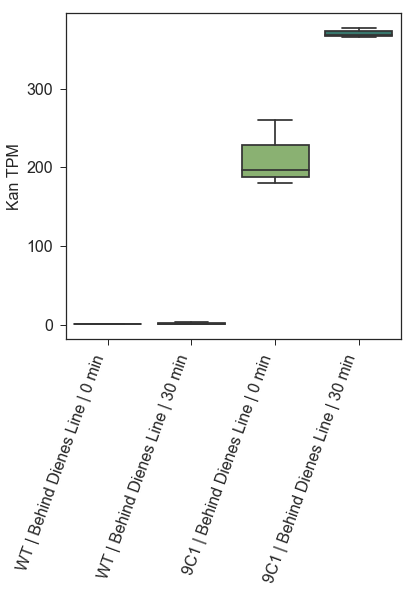

In [14]:
fig = plt.figure(figsize = (6,6))
order = [samples["Case12"], samples["Case7"], samples["Case11"], samples["Case8"]]
ax = sns.boxplot(x= "samples", y="Kan TPM", data = mk, palette=colors, order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
fig.savefig(os.path.join(figures_dir, "supplemental_killing_on_the_line_30_min.png"), dpi=300, bbox_inches="tight")